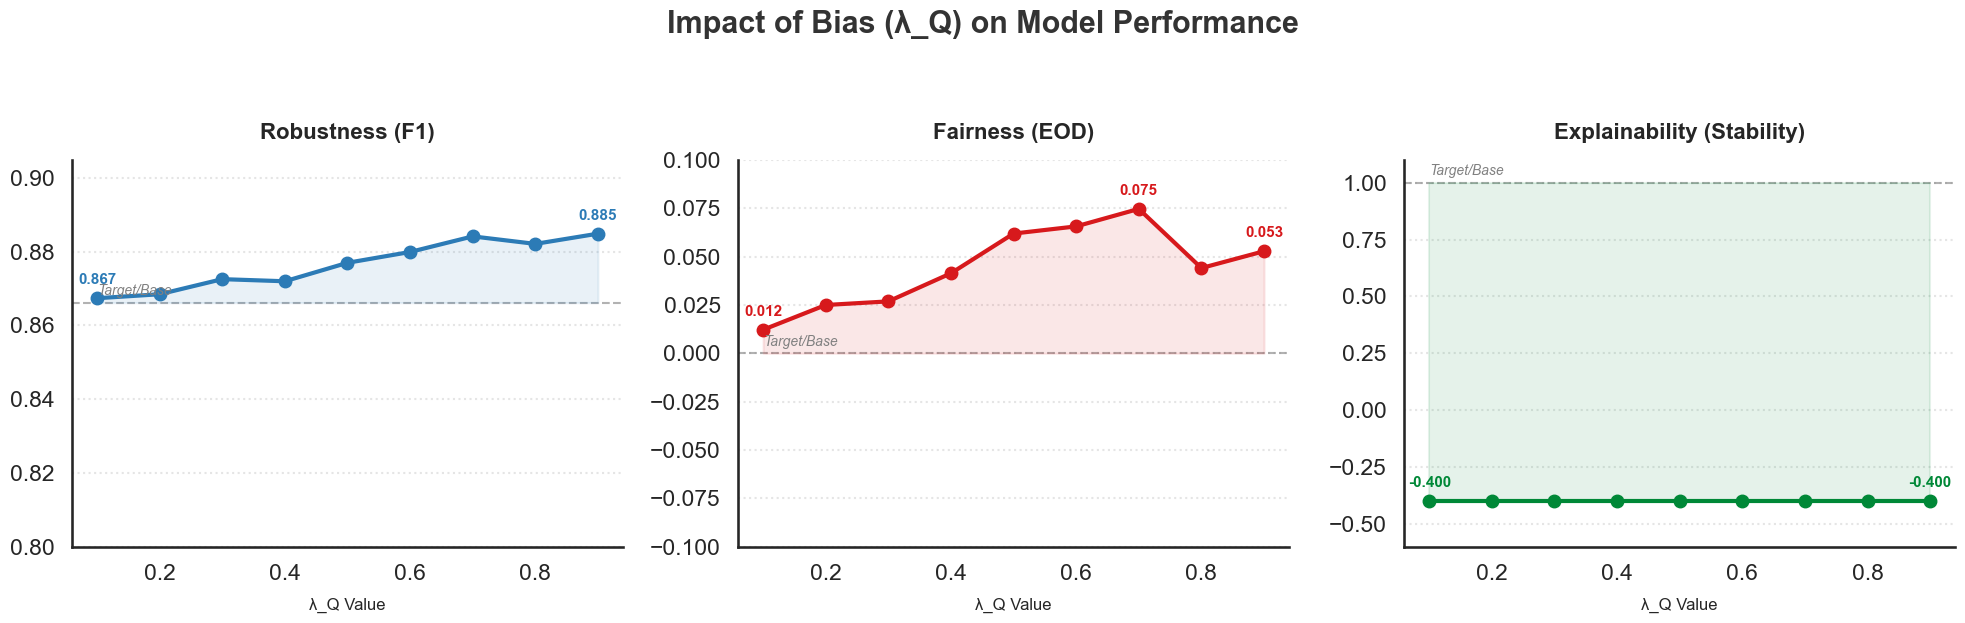

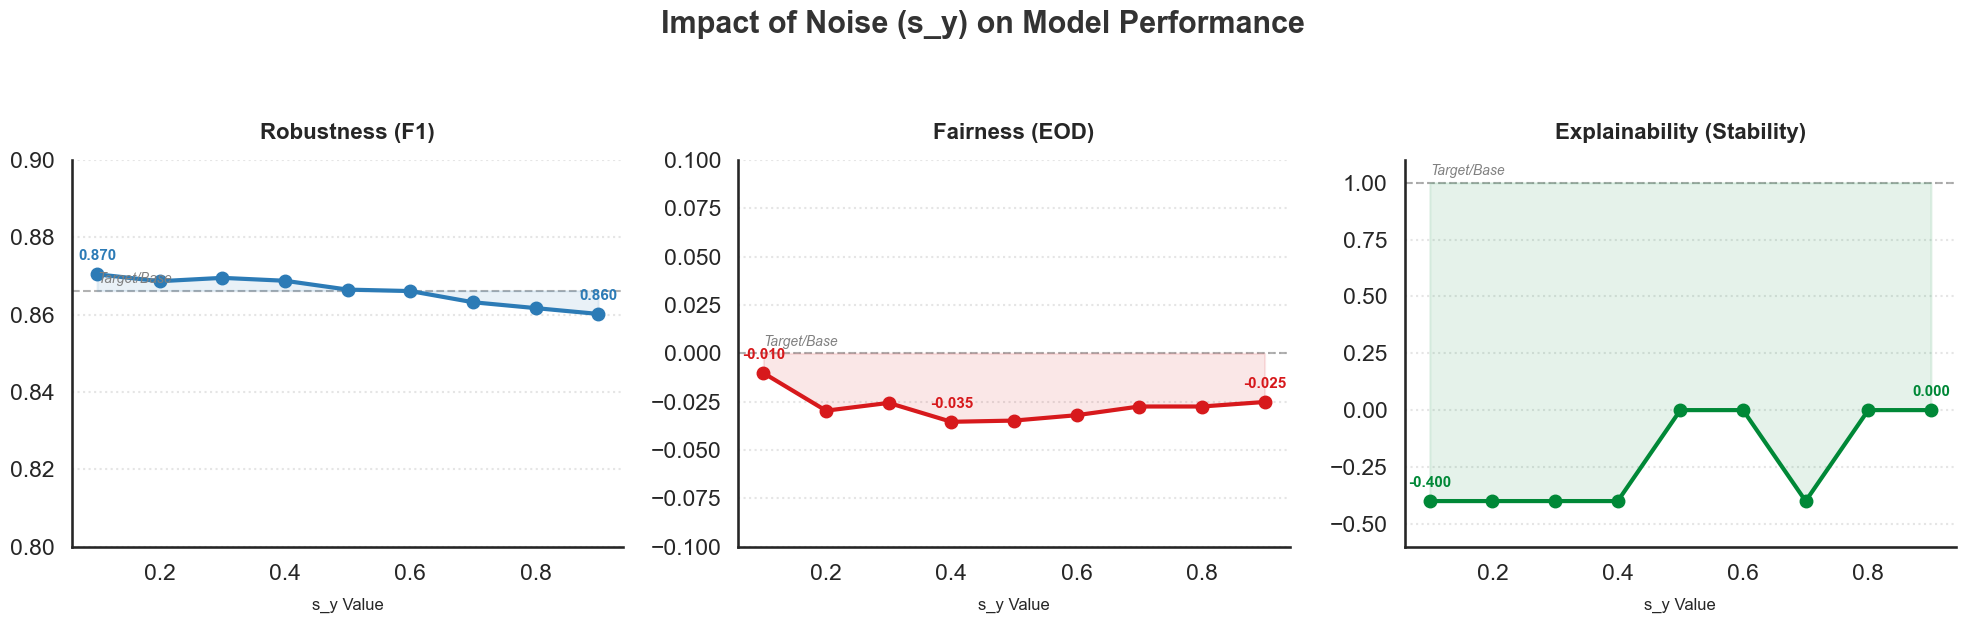

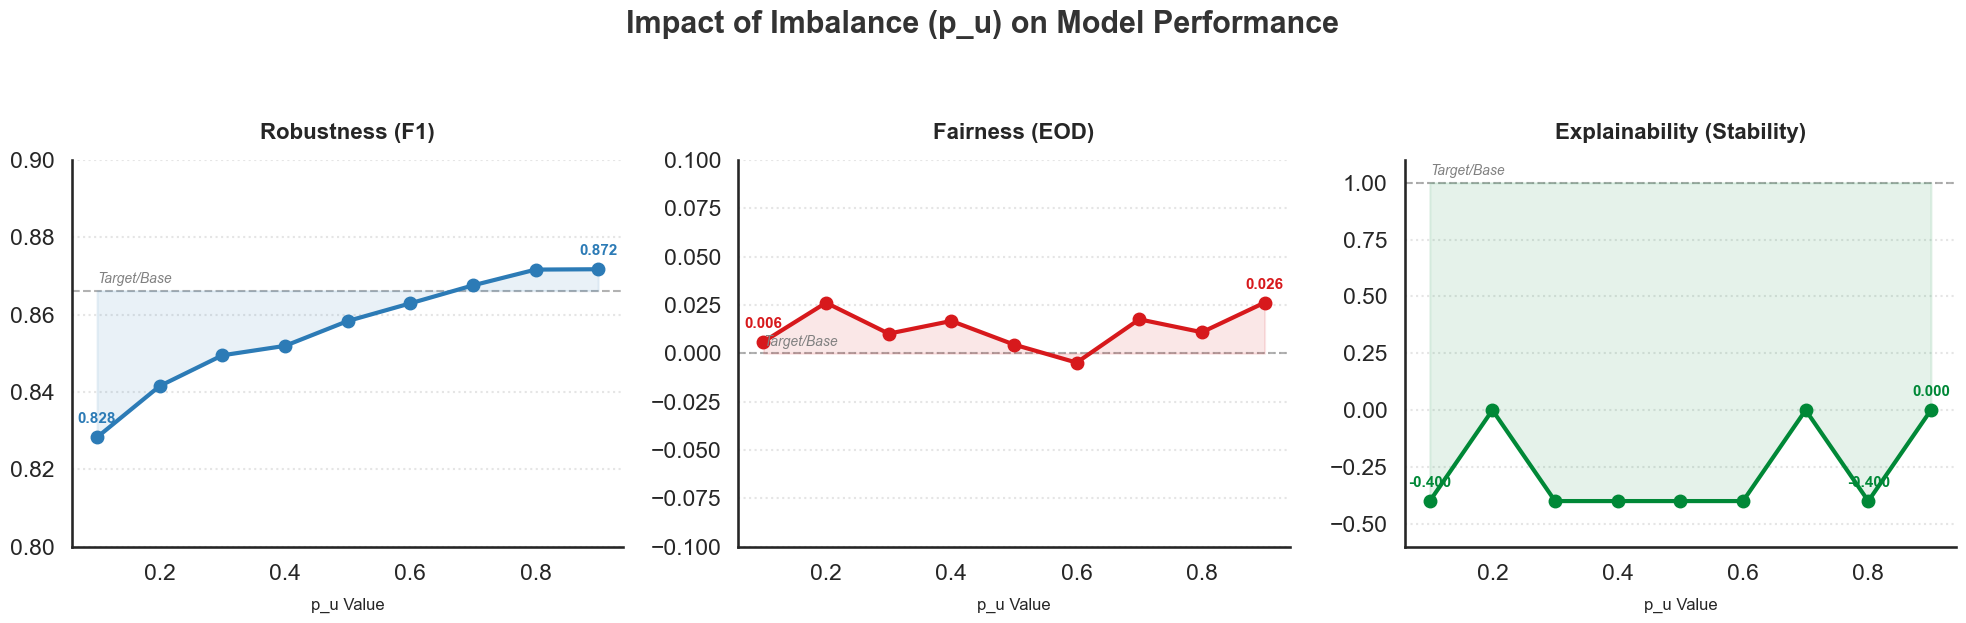

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# --- 1. Setup & Data Loading ---
# (Using the string data you provided previously for reproducibility. 
#  Replace this block with your actual file loading if needed.)

# Visualization Setup - Professional Style
sns.set_theme(style="white", context="talk") # Cleaner background, larger text
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# MOCK DATA LOADING (Replace with your actual file load)
df = pd.read_csv('project_audit_results.csv') 


# --- Data Cleaning (From your script) ---
df_baseline = df[df['Condition'] == 'Baseline'].copy()
df_experiments = df[df['Condition'] != 'Baseline'].copy()
df_experiments['Parameter_Value'] = pd.to_numeric(df_experiments['Parameter_Value'], errors='coerce')

# Reference Points
F1_REF_VALUE = df_experiments['Overall_F1_Score'].mean() 
EOD_REF_VALUE = 0.0 
SHAP_REF_VALUE = 1.0 

# Sorting
bias_df = df_experiments[df_experiments['Condition'] == 'bias'].sort_values('Parameter_Value')
noise_df = df_experiments[df_experiments['Condition'] == 'noise'].sort_values('Parameter_Value')
imbalance_df = df_experiments[df_experiments['Condition'] == 'imbalance'].sort_values('Parameter_Value', ascending=False)

# --- 2. Improved Plotting Function ---

def plot_professional_series(data, condition_name, parameter_symbol):
    if data.empty:
        print(f"No data for {condition_name}, skipping.")
        return

    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Title styling
    fig.suptitle(f'Impact of {condition_name} ({parameter_symbol}) on Model Performance', 
                 fontsize=22, fontweight='bold', color='#333333', y=1.05)

    # Metric Definitions
    # Format: (Column, Label, Reference Value, Color, Y-Limits)
    metrics_config = [
        ('Overall_F1_Score', 'Robustness (F1)', F1_REF_VALUE, '#2c7bb6', (0.8, 0.9)), # Deep Blue
        ('Equal_Opportunity_Difference', 'Fairness (EOD)', EOD_REF_VALUE, '#d7191c', (-0.1, 0.1)), # Red
        ('SHAP_Rank_Stability', 'Explainability (Stability)', SHAP_REF_VALUE, '#008837', (-0.6, 1.1)) # Green
    ]

    for ax, (col, label, ref, color, y_lim) in zip(axes, metrics_config):
        x = data['Parameter_Value']
        y = data[col]

        # 1. Draw the Reference Line (Subtle)
        ax.axhline(ref, color='gray', linestyle='--', linewidth=1.5, alpha=0.6, zorder=1)
        ax.text(x.min(), ref + (y_lim[1]-y_lim[0])*0.02, 'Target/Base', color='gray', fontsize=10, style='italic')

        # 2. Draw the Main Line with Area Fill
        # We fill the area between the curve and the reference line to show "deviation"
        ax.plot(x, y, marker='o', markersize=9, linewidth=3, color=color, label=label, zorder=2)
        ax.fill_between(x, y, ref, color=color, alpha=0.1)

        # 3. Smart Annotations (Only Start, End, and Max deviation to avoid clutter)
        # Identify points to label: Start, End, and maybe the point furthest from reference
        idx_max_dev = (y - ref).abs().idxmax()
        points_to_label = [x.index[0], x.index[-1]] 
        if idx_max_dev not in points_to_label:
            points_to_label.append(idx_max_dev)
            
        for i in points_to_label:
            val = data.loc[i, col]
            px = data.loc[i, 'Parameter_Value']
            # Small offset for the text
            ax.annotate(f"{val:.3f}", xy=(px, val), xytext=(0, 10), 
                        textcoords='offset points', ha='center', fontsize=11, fontweight='bold', color=color)

        # 4. Cosmetic Polish
        ax.set_title(label, fontsize=16, pad=15, fontweight='demi')
        ax.set_xlabel(f'{parameter_symbol} Value', fontsize=12, labelpad=10)
        ax.set_ylabel('') # Redundant if title is clear
        
        # Grid and Spines
        ax.grid(axis='y', linestyle=':', alpha=0.5) # Horizontal grid only
        
        # Dynamic Y-Limits (Optional: Use fixed if you want strict comparison, or auto for detail)
        # Using the passed y_lim but adding a small buffer if data exceeds it
        current_min, current_max = y.min(), y.max()
        display_min = min(y_lim[0], current_min - 0.02)
        display_max = max(y_lim[1], current_max + 0.02)
        ax.set_ylim(display_min, display_max)

    plt.tight_layout()
    plt.show()

# --- 3. Execution ---

plot_professional_series(bias_df, 'Bias', 'λ_Q')
plot_professional_series(noise_df, 'Noise', 's_y')
plot_professional_series(imbalance_df, 'Imbalance', 'p_u')